_________
# **Data Visualization using Seaborn**
____

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Example-1: Scatter plot

[149 153 159 162 165 167 169 171 178 180]
[59 63 65 68 70 77 80 86 91 95]


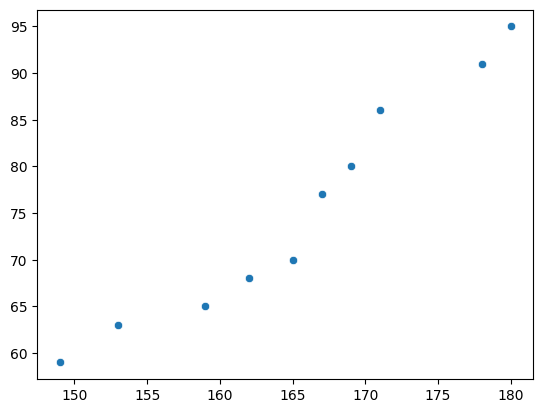

In [2]:
# Creating a sample dataset (arrays) for plotting
ht = np.array([169, 167, 149, 165, 159, 180, 178, 153, 162, 171])
height = np.sort(ht)
wt = np.array([86, 70, 59, 95, 80, 63, 77, 65, 91, 68])
weight = np.sort(wt)

print(height)
print(weight)

sns.scatterplot(x=height, y=weight)
plt.show()

### Example-2: Counting plot
- Its a rather specific kind of bar chart representing the frequency of each category.
- Barplot allows comparing a numerical data with respect to a categorical data.
- The `Countplot` is more intended to count the occurrences of categorical data.

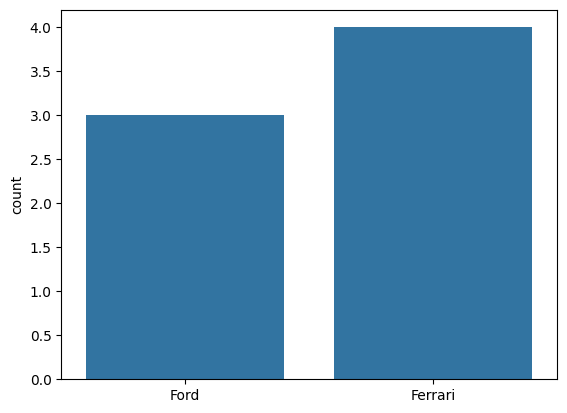

In [3]:
car_brand = ["Ford", "Ferrari", "Ferrari", "Ferrari", "Ferrari","Ford","Ford"]
sns.countplot(x=car_brand)
plt.show()

____
## Analyzing a dataset
Using the `countries-of-the-world` dataset to plot & discover interesting insights

In [4]:
countries = pd.read_csv("./course_datasets/seaborn_datasets/countries-of-the-world.csv")
countries.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [5]:
print(countries.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

**Q:Create a scatter plot of GDP (gdp) vs. number of phones per 1000 people (phones). Use the columns as two separate lists**

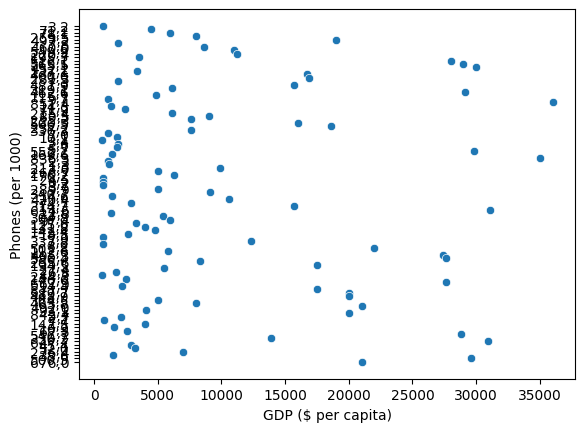

In [6]:
# Creating the two lists for inputs
gdp = countries["GDP ($ per capita)"].head(100).squeeze()
phones = countries["Phones (per 1000)"].head(100).squeeze()

sns.scatterplot(x=gdp, y=phones)
plt.show()

> ### Some data cleaning was required
> The plot is so cluttered because there are missing values for some rows in both the lists - especially in Phones column, the numerical values contain the `, (comma)` separator instead of a decimal point. <br>
> So We'll first replace `, (comma)` with `. (decimal)` & then convert dtype to float using `astype()` 

In [7]:
countries["Phones (per 1000)"].str.contains(',')

0      True
1      True
2      True
3      True
4      True
       ... 
222    True
223     NaN
224    True
225    True
226    True
Name: Phones (per 1000), Length: 227, dtype: object

Converting the Phones column to String

In [8]:
countries["Phones (per 1000)"].astype("str")
countries["Phones (per 1000)"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 227 entries, 0 to 226
Series name: Phones (per 1000)
Non-Null Count  Dtype 
--------------  ----- 
223 non-null    object
dtypes: object(1)
memory usage: 1.9+ KB


Replacing the `,` to `.` and recasting the column to `float` dtype

In [9]:
countries["Phones (per 1000)"] = countries["Phones (per 1000)"].str.replace(',','.').astype("float")
countries["Phones (per 1000)"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 227 entries, 0 to 226
Series name: Phones (per 1000)
Non-Null Count  Dtype  
--------------  -----  
223 non-null    float64
dtypes: float64(1)
memory usage: 1.9 KB


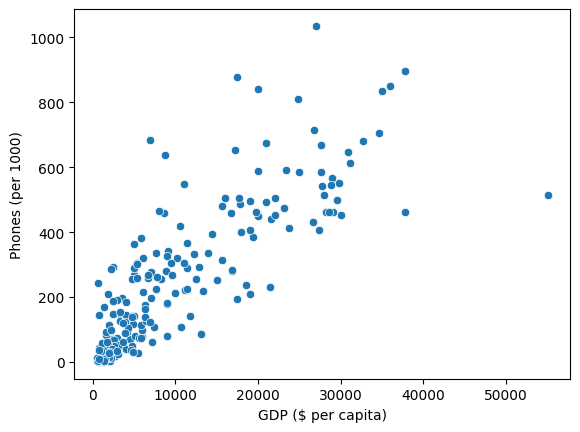

In [10]:
phones = countries["Phones (per 1000)"].squeeze()
gdp = countries["GDP ($ per capita)"].squeeze()
sns.scatterplot(x=gdp, y=phones)
plt.show()

### Using a better alternative
Converting all commas to decimals during the time of loading the dataframe itself

In [11]:
new_countries = pd.read_csv("./course_datasets/seaborn_datasets/countries-of-the-world.csv", index_col=0, decimal=',')
new_countries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 227 entries, Afghanistan  to Zimbabwe 
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Region                              227 non-null    object 
 1   Population                          227 non-null    int64  
 2   Area (sq. mi.)                      227 non-null    int64  
 3   Pop. Density (per sq. mi.)          227 non-null    float64
 4   Coastline (coast/area ratio)        227 non-null    float64
 5   Net migration                       224 non-null    float64
 6   Infant mortality (per 1000 births)  224 non-null    float64
 7   GDP ($ per capita)                  226 non-null    float64
 8   Literacy (%)                        209 non-null    float64
 9   Phones (per 1000)                   223 non-null    float64
 10  Arable (%)                          225 non-null    float64
 11  Crops (%)                        

**Q: Change the scatter plot so it displays the percent of the population that can read and write (percent_literate) on the y-axis.**

In [12]:
new_gdp = new_countries["GDP ($ per capita)"].squeeze()
new_literacy = new_countries["Literacy (%)"].squeeze()

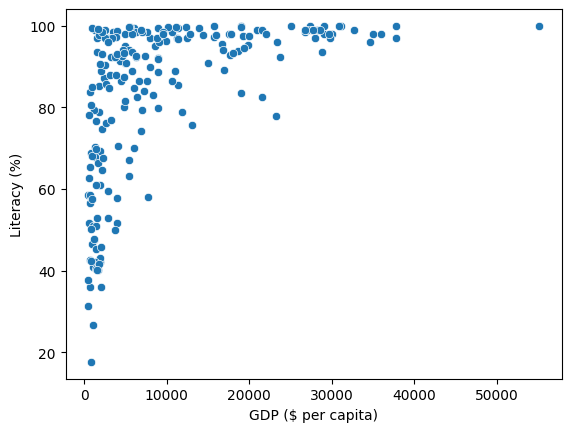

In [13]:
sns.scatterplot(x=new_gdp, y=new_literacy)
plt.show()

>While this plot does not show a linear relationship between GDP and percent literate, countries with a lower GDP do seem more likely to have a lower percent of the population that can read and write.

**Q: how many countries are in each region of the world**

In [14]:
new_countries["Region"].value_counts()

Region
SUB-SAHARAN AFRICA                     51
LATIN AMER. & CARIB                    45
ASIA (EX. NEAR EAST)                   28
WESTERN EUROPE                         28
OCEANIA                                21
NEAR EAST                              16
EASTERN EUROPE                         12
C.W. OF IND. STATES                    12
NORTHERN AFRICA                         6
NORTHERN AMERICA                        5
BALTICS                                 3
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Region'>

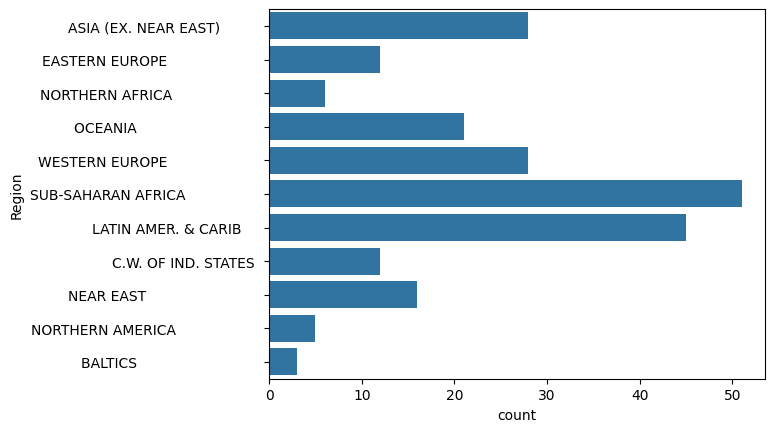

In [15]:
sns.countplot(data=new_countries, y="Region")

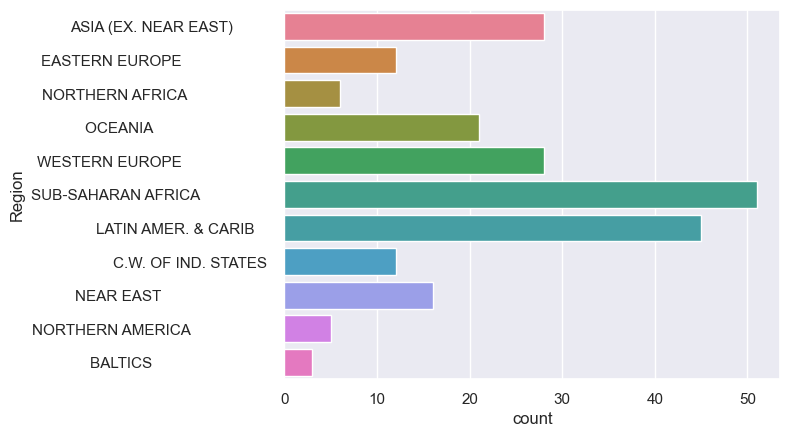

In [22]:
# A more beautified version -- setting a seaborn theme & using the hue argument to make the plot distinguishing by color
sns.set_theme(style="darkgrid")  # or "whitegrid", "dark", etc.
sns.countplot(data=new_countries, y="Region",hue="Region")
plt.show()

> As observed from above plot , the dataframe contains a very large no. of Sub-Saharan African countries.
___
# Using pandas + Seaborn
> Seaborn libraries mostly use the syntax : `sns.plot`(`x=`, `y=`, `data=`)
- Many of the low-level arguments we used to pass when using matplotlib are taken care of by the abstractions in seaborn.
- One big advantage is the auto-labelling of the x & y axes based on the columns plotted in each of these axes.
- However it needs to be ensured that the dataframe used in the plots is **'tidy'** -- meaning each row is a distinct observation & that each column value is a valid value.
- This why data pre-processing is an essential & critical step when conducting any EDA or even data visualization tasks

### Using the `hue` argument to add a third variable
Also , making use of `sns.load_dataset()` to load a default dataset that comes included with seaborn.

In [23]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


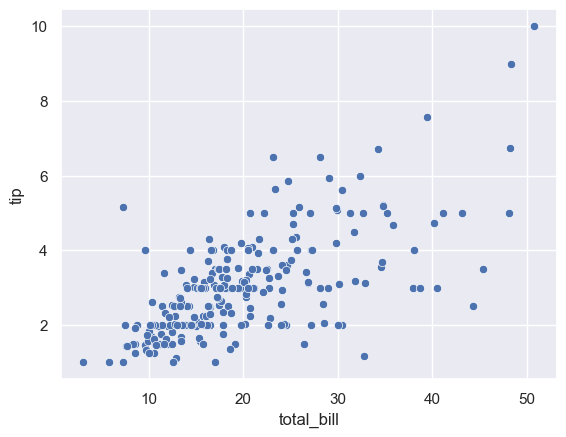

In [25]:
sns.scatterplot(x="total_bill", y="tip", data=tips)
plt.show()

We can add a third variable - for example , whether to distinguish whether customer was a smokr/ non-smoker - using the `hue` parameter
- This argument is available in multiple plot types in seaborn
- NOTICE how the legend is also added automatically
- the order of coloring can be specified by passing a list using `hue_order`

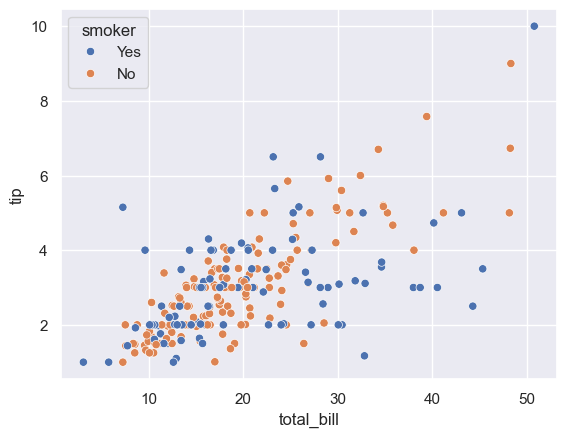

In [26]:
sns.scatterplot(x="total_bill", y="tip", data=tips, hue="smoker")
plt.show()

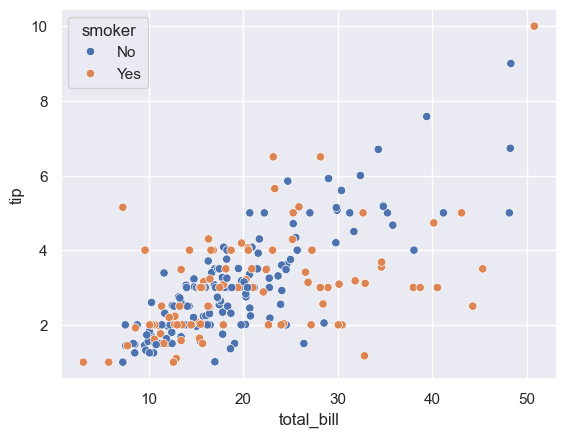

In [28]:
sns.scatterplot(x="total_bill", y="tip", data=tips, hue="smoker", hue_order=["No", "Yes"])
plt.show()

### Specifying hue colors
Colors of each variable can be contorlled by **passing a dictionary** into the `palette` parameters 
- The color names that are defined under matplotlib can be called directly by name. But different colors can be specified using the HEX code 

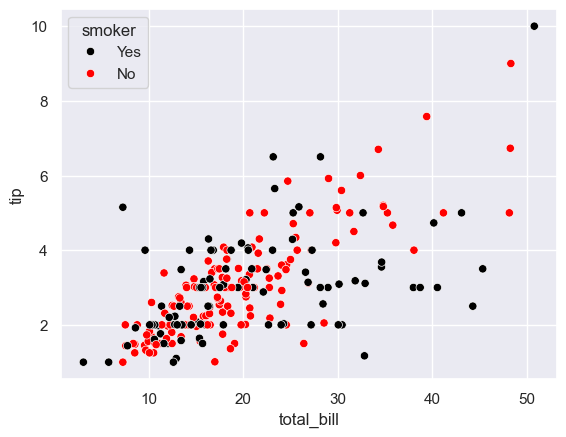

In [30]:
hue_colors = {"No": "red", "Yes": "black"}

sns.scatterplot(x="total_bill", y="tip", data=tips, hue="smoker", palette=hue_colors)
plt.show()

### Using `hue` to for other plot types - e.g. `countplot()`
Counting Smokers / Non-smokers & also distinguishing based on gender

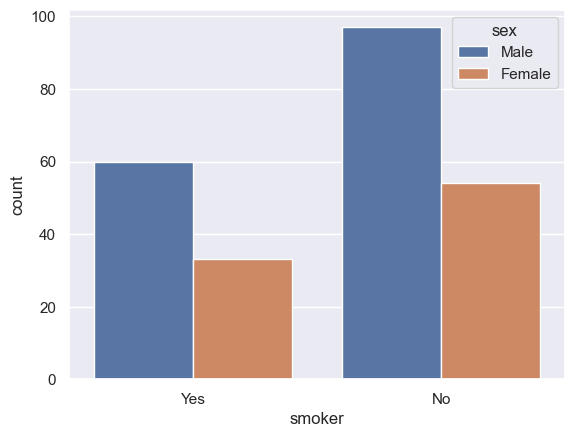

In [32]:
sns.countplot(x="smoker", data=tips, hue="sex")
plt.show()

> Thus we observe that males outnumber females in both smoking & non-smokking categories

## Adding subplots in seaborn
Using `relplot` -- continuing to learn on relational plots + learning to create subplots. <br>
<br>

Using the `col`, `row` & arguments on the `tips` dataset to create subplots for different categories into which the data can be divided for more analysis & insights.

In [35]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


### Using `col` argument to create multiple columns of subplots
Helps create subplots side-by-side

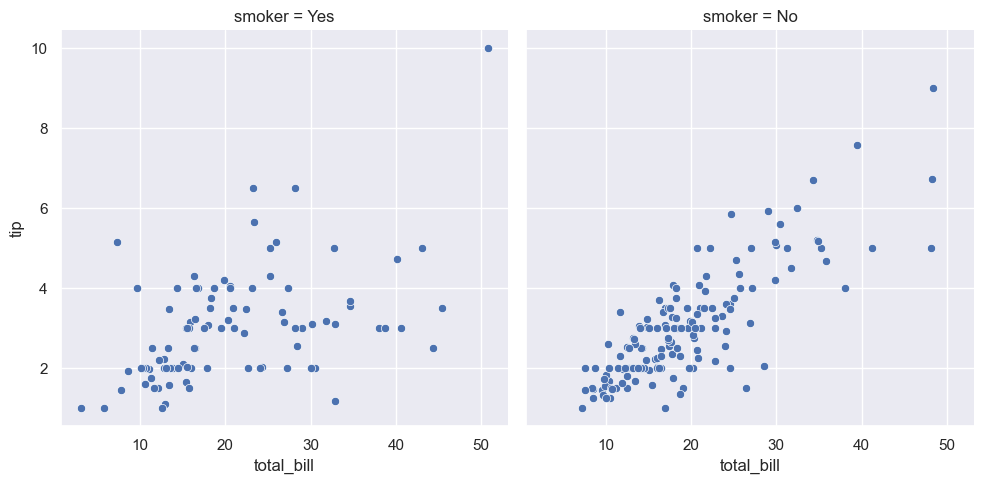

In [39]:
# Creating a 1 X 2 relational plot for distinguish the tipping behaviours of smokers & non-smokers

sns.relplot(x="total_bill", y="tip", data=tips, col="smoker")
plt.show()

### Using `row` argument to create multiple rows of the subplots
Helps stack subplots one-below-another

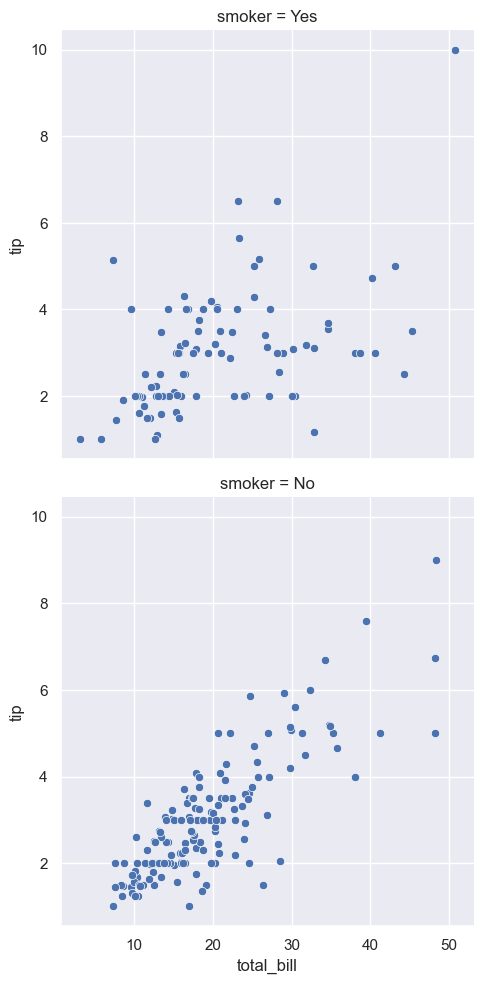

In [46]:
# Creating a 2 X 1 relational plot for distinguish the tipping behaviours of smokers & non-smokers

sns.relplot(x="total_bill", y="tip", data=tips, row="smoker")
plt.show()

### Creating a 2 X 2 plot to distinguish between smokers/ non-smokers at different times of the day 
(i.e whether lunch or dinner time)
- Using `col` and `row` arguments at the same time

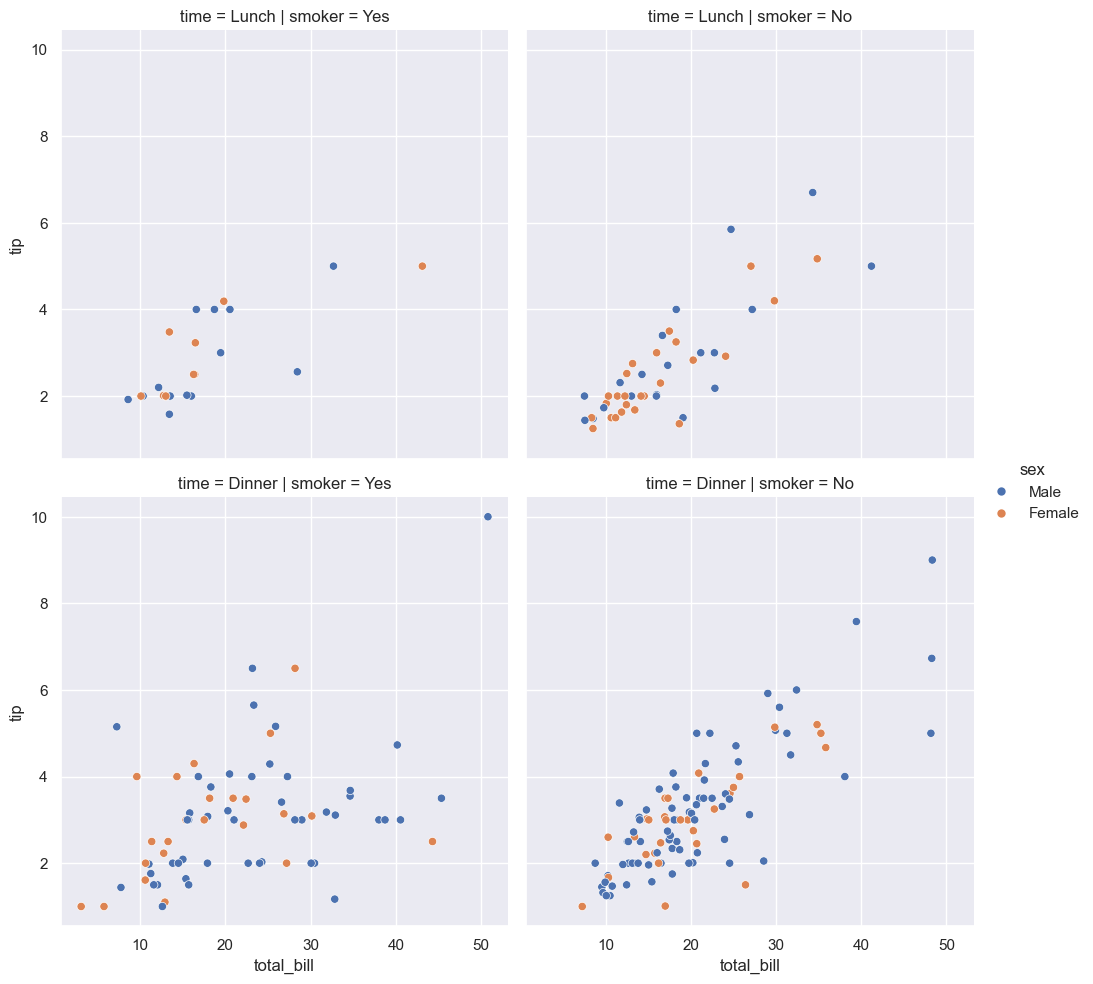

In [44]:
# Creating a 2 X 2 plot to distinguish betwn smokers/ non-smokers + time of the day
sns.relplot(x="total_bill", y="tip", data=tips, kind="scatter", col="smoker", row="time",hue="sex")
plt.show()


### Creating multiple sub-plots to plot tipping behaviours at different times of the day


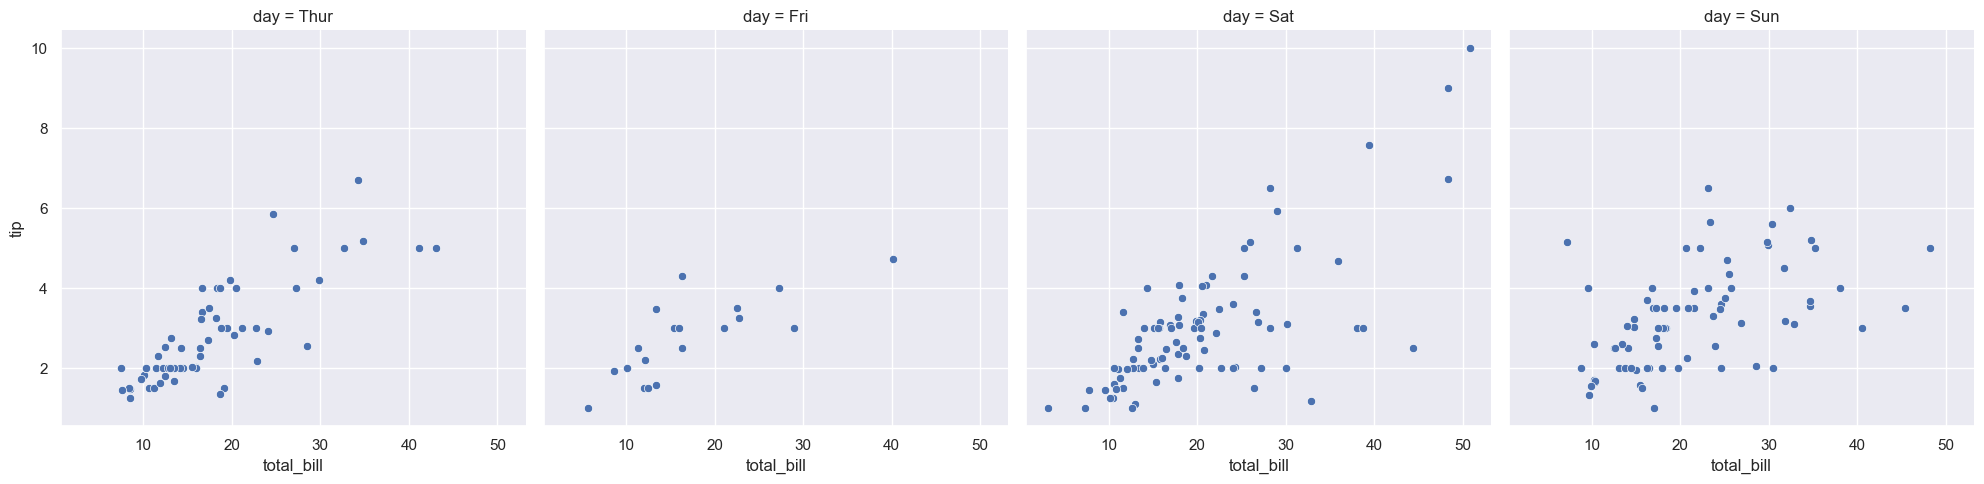

In [45]:
# Creating a 4 subplots to plot tipping behaviours at different times of the day
sns.relplot(x="total_bill", y="tip", data=tips, kind="scatter", col="day")
plt.show()


### Use `col_wrap` to specify no. of subplots per row
this will create a 2X2 subplot

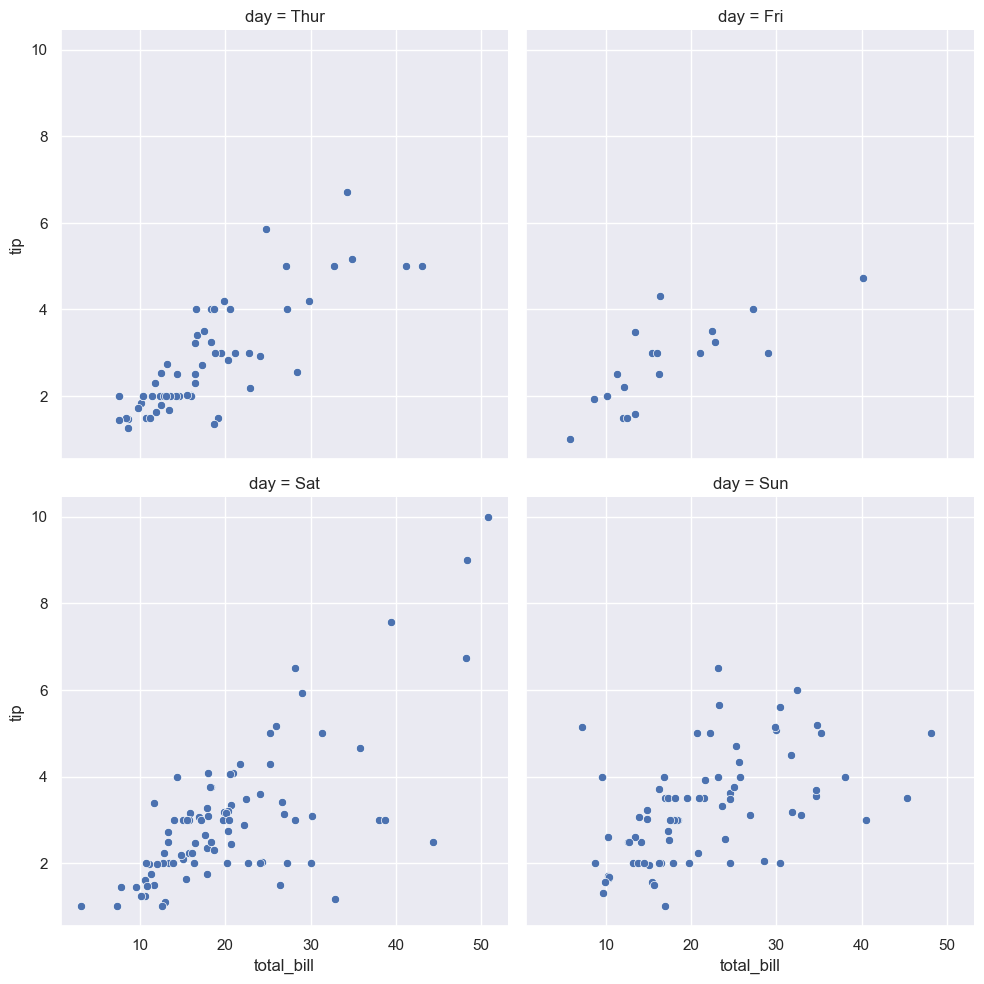

In [48]:
sns.relplot(x="total_bill", y="tip", data=tips, kind="scatter", col="day", col_wrap=2)
plt.show()